In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Task 1: A First CA Model**

Text(0, 0.5, 'Timestep')

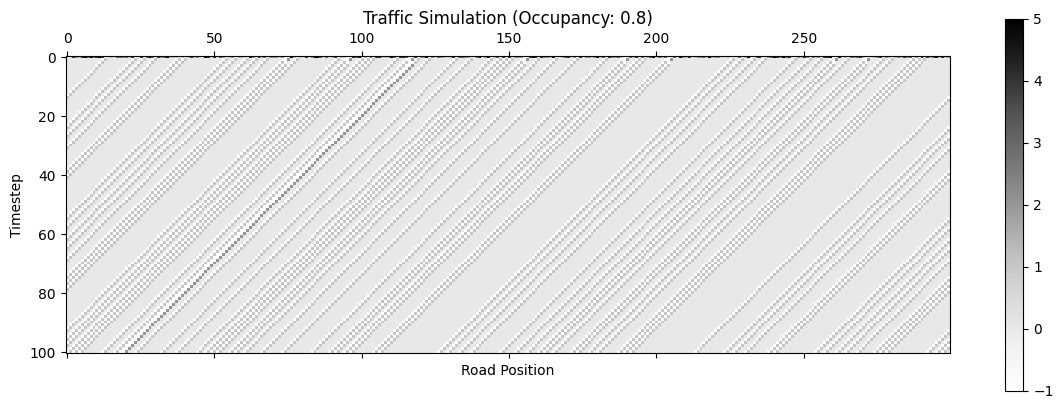

In [ ]:
# Initialize simulation parameters
occ = 0.80
N = 300
timesteps = 100

# Set initial conditions
sim = np.zeros((1, N), dtype=int) - 1
indices = np.arange(N)
i = np.random.choice(indices, (int(N * occ)), replace=False)
speeds = np.random.randint(6, size=(int(N * occ)))
sim[0, i] = speeds

# Initialize first timestep
curr = np.empty_like(sim)
curr[0, :] = sim[0, :]

for timestep in range(timesteps):
  # Get current indices of cars
  carsIdx = np.nonzero(curr > -1)[1]

  # Calculate distances
  dist = np.empty_like(carsIdx)
  dist[:-1] = carsIdx[1:] - carsIdx[:-1] - 1
  dist[-1] = ((carsIdx[0] - carsIdx[-1]) % N) - 1

  # Accelerate
  curr[0, carsIdx] = curr[0, carsIdx] + 1
  overlimit = np.nonzero(curr > 5)[1]
  curr[0, overlimit] = 5

  # Decelerate
  speed = curr[0, carsIdx]
  curr[0, carsIdx] = np.minimum(speed, dist)

  # Move
  new = np.zeros_like(curr) - 1
  for i, val in enumerate(curr[0, :]):
    if val > -1:
      new[0, (i + val) % N] = val

  # Add timestep to simulation
  sim = np.concatenate((sim, new))
  curr[0, :] = new[0, :]

# Plot
plt.matshow(sim, cmap='Greys')
plt.colorbar()
plt.title(f'Traffic Simulation (Occupancy: {occ})')
plt.xlabel('Road Position')
plt.ylabel('Timestep')

**Task 2: Stochastic Behavior**

Text(0, 0.5, 'Timestep')

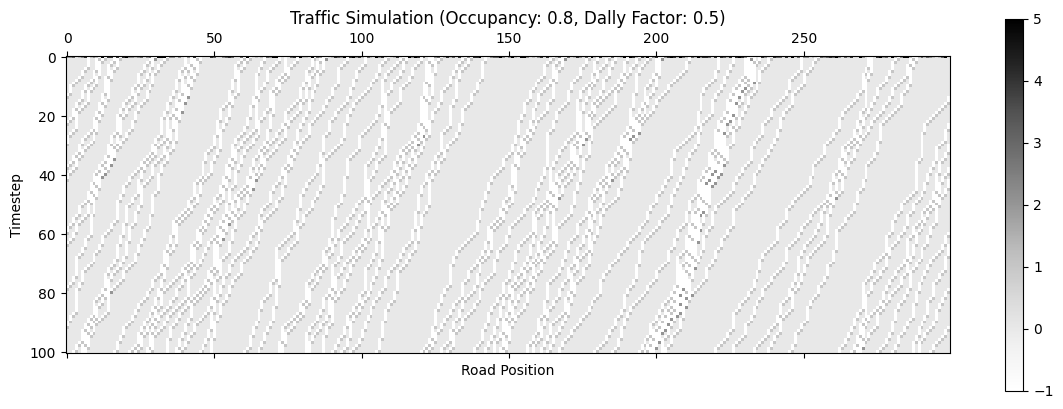

In [ ]:
# Initialize simulation parameters
p = 0.5
occ = 0.8
N = 300
timesteps = 100

# Set initial conditions
sim = np.zeros((1, N), dtype=int) - 1
indices = np.arange(N)
i = np.random.choice(indices, (int(N * occ)), replace=False)
speeds = np.random.randint(6, size=(int(N * occ)))
sim[0, i] = speeds

# Initialize first timestep
curr = np.empty_like(sim)
curr[0, :] = sim[0, :]

for timestep in range(timesteps):
  # Get current indices of cars
  carsIdx = np.nonzero(curr > -1)[1]

  # Calculate distances
  dist = np.empty_like(carsIdx)
  dist[:-1] = carsIdx[1:] - carsIdx[:-1] - 1
  dist[-1] = ((carsIdx[0] - carsIdx[-1]) % N) - 1

  # Accelerate
  curr[0, carsIdx] = curr[0, carsIdx] + 1
  overlimit = np.nonzero(curr > 5)[1]
  curr[0, overlimit] = 5

  # Decelerate
  speed = curr[0, carsIdx]
  curr[0, carsIdx] = np.minimum(speed, dist)

  # Dally
  dally = np.random.choice([0, 1], size=curr[0, carsIdx].shape, p=[1-p, p])
  curr[0, carsIdx] = curr[0, carsIdx] - dally
  underlimit = np.nonzero(curr[0, carsIdx] < 0)[0]
  curr[0, carsIdx[underlimit]] = 0

  # Move
  new = np.zeros_like(curr) - 1
  for i, val in enumerate(curr[0, :]):
    if val > -1:
      new[0, (i + val) % N] = val

  # Add timestep to simulation
  sim = np.concatenate((sim, new))
  curr[0, :] = new[0, :]

# Plot
plt.matshow(sim, cmap='Greys')
plt.colorbar()
plt.title(f'Traffic Simulation (Occupancy: {occ}, Dally Factor: {p})')
plt.xlabel('Road Position')
plt.ylabel('Timestep')

**Task 3: Two Lane Traffic**

Switch from R to L at time 9
Switch from R to L at time 9
Switch from L to R at time 24
Switch from R to L at time 32
Switch from R to L at time 35
Switch from R to L at time 52
Switch from R to L at time 58
Switch from L to R at time 67
Switch from L to R at time 79
Switch from L to R at time 79
Switch from L to R at time 81
Switch from L to R at time 89
Switch from L to R at time 91
Switch from R to L at time 97
Number of lane switches: 14


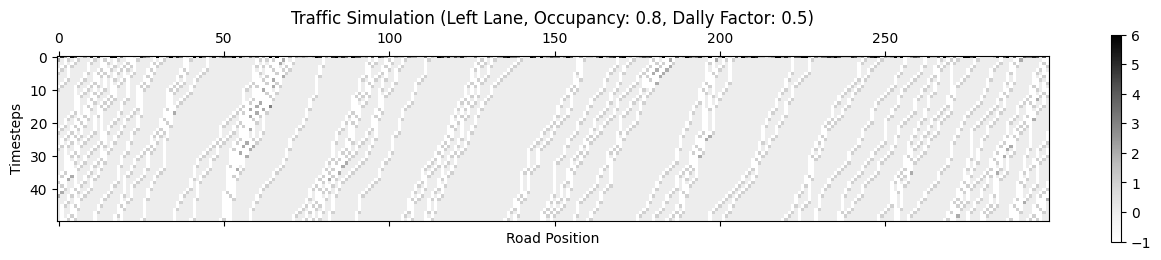

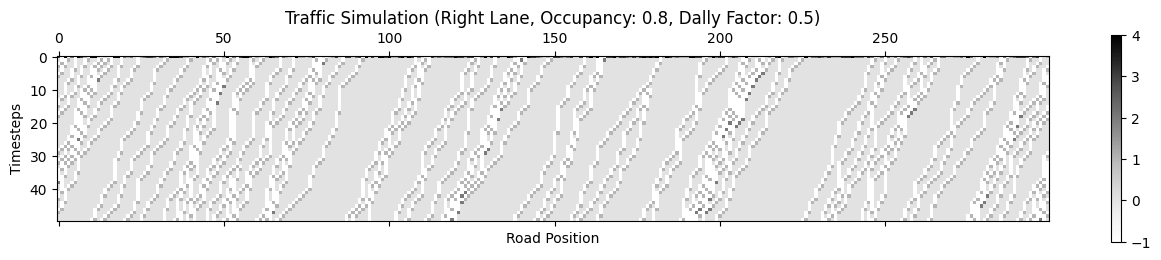

In [85]:
# Initialize simulation parameters
p = 0.5
occ = 0.8
N = 300
timesteps = 100
Lmax = 6
Rmax = 4

# Set initial conditions
switches = 0
sim = np.zeros((2, N), dtype=int) - 1
indices = np.arange(N)
i = np.random.choice(indices, (int(N * occ)), replace=False)
speeds = np.random.randint(Lmax + 1, size=(int(N * occ)))
sim[0, i] = speeds
i = np.random.choice(indices, (int(N * occ)), replace=False)
speeds = np.random.randint(Rmax + 1, size=(int(N * occ)))
sim[1, i] = speeds
# Even index rows are left lanes, odd index rows are right lanes

# Initialize first timestep
Lcurr = np.empty_like(sim[0, :])[np.newaxis, :]
Lcurr[0, :] = sim[0, :]
Rcurr = np.empty_like(sim[1, :])[np.newaxis, :]
Rcurr[0, :] = sim[1, :]

for timestep in range(timesteps):
  # Get current indices of cars
  LcarsIdx = np.nonzero(Lcurr > -1)[1]
  RcarsIdx = np.nonzero(Rcurr > -1)[1]

  # Calculate distances
  Ldist = np.empty_like(LcarsIdx)
  Ldist[:-1] = LcarsIdx[1:] - LcarsIdx[:-1] - 1
  Ldist[-1] = ((LcarsIdx[0] - LcarsIdx[-1]) % N) - 1
  Rdist = np.empty_like(RcarsIdx)
  Rdist[:-1] = RcarsIdx[1:] - RcarsIdx[:-1] - 1
  Rdist[-1] = ((RcarsIdx[0] - RcarsIdx[-1]) % N) - 1

  # Accelerate
  Lcurr[0, LcarsIdx] = Lcurr[0, LcarsIdx] + 1
  overlimit = np.nonzero(Lcurr > Lmax)[1]
  Lcurr[0, overlimit] = Lmax
  Rcurr[0, RcarsIdx] = Rcurr[0, RcarsIdx] + 1
  overlimit = np.nonzero(Rcurr > Rmax)[1]
  Rcurr[0, overlimit] = Rmax

  # Lane change
  Lspeed = Lcurr[0, LcarsIdx]
  Rspeed = Rcurr[0, RcarsIdx]
  # Indices where need to decelerate
  LswitchIdx = LcarsIdx[np.nonzero(Lspeed > Ldist)[0]]
  RswitchIdx = RcarsIdx[np.nonzero(Rspeed > Rdist)[0]]
  # L/R[k] must not be occupied
  LswitchIdx = LswitchIdx[np.nonzero(Rcurr[0, LswitchIdx] == -1)[0]]
  RswitchIdx = RswitchIdx[np.nonzero(Lcurr[0, RswitchIdx] == -1)[0]]
  # Check lane conditions and switch from left lane
  for k in LswitchIdx:
    # Ensure current velocity is less than max velocity of right lane
    if Lcurr[0, k] > Rmax:
      continue
    # Check car behind in other lane
    if len(RcarsIdx[RcarsIdx < k]) > 0:
      RhIdx = np.max(RcarsIdx[RcarsIdx < k])
      RhSpeed = Rcurr[0, RhIdx]
      hi = k - RhIdx - 1
      if RhSpeed > hi:
        continue
    else:
      RhIdx = RcarsIdx[-1]
      RhSpeed = Rcurr[0, RhIdx]
      hi = ((k - RhIdx) % N) - 1
      if RhSpeed > hi:
        continue
    # Check car in front in other lane
    if len(RcarsIdx[RcarsIdx > k]) > 0:
      RjIdx = np.min(RcarsIdx[RcarsIdx > k])
      LiSpeed = Lcurr[0, k]
      ij = RjIdx - k - 1
      if LiSpeed > ij:
        continue
    else:
      RjIdx = RcarsIdx[0]
      LiSpeed = Lcurr[0, k]
      ij = ((RjIdx - k) % N) - 1
      if LiSpeed > ij:
        continue
    # Check car behind in same lane
    if len(LcarsIdx[LcarsIdx < k]) > 0:
      Li_1Idx = np.max(LcarsIdx[LcarsIdx < k])
      Li_1Speed = Lcurr[0, Li_1Idx]
      i_1i = k - Li_1Idx - 1
      if Li_1Speed > i_1i:
        continue
    else:
      Li_1Idx = LcarsIdx[-1]
      Li_1Speed = Lcurr[0, Li_1Idx]
      i_1i = ((k - Li_1Idx) % N) - 1
      if Li_1Speed > i_1i:
        continue
    # Switch lanes
    Rcurr[0, k] = Lcurr[0, k]
    Lcurr[0, k] = -1
    print(f"Switch from L to R at time {timestep}")
    switches += 1
  # Check lane conditions and switch from right lane
  for k in RswitchIdx:
    # Check car behind in other lane
    if len(LcarsIdx[LcarsIdx < k]) > 0:
      LhIdx = np.max(LcarsIdx[LcarsIdx < k])
      LhSpeed = Lcurr[0, LhIdx]
      hi = k - LhIdx - 1
      if LhSpeed > hi:
        continue
    else:
      LhIdx = LcarsIdx[-1]
      LhSpeed = Lcurr[0, LhIdx]
      hi = ((k - LhIdx) % N) - 1
      if LhSpeed > hi:
        continue
    # Check car in front in other lane
    if len(LcarsIdx[LcarsIdx > k]) > 0:
      LjIdx = np.min(LcarsIdx[LcarsIdx > k])
      RiSpeed = Rcurr[0, k]
      ij = LjIdx - k - 1
      if RiSpeed > ij:
        continue
    else:
      LjIdx = LcarsIdx[0]
      RiSpeed = Rcurr[0, k]
      ij = ((LjIdx - k) % N) - 1
      if RiSpeed > ij:
        continue
    # Check car behind in same lane
    if len(RcarsIdx[RcarsIdx < k]) > 0:
      Ri_1Idx = np.max(RcarsIdx[RcarsIdx < k])
      Ri_1Speed = Rcurr[0, Ri_1Idx]
      i_1i = k - Ri_1Idx - 1
      if Ri_1Speed > i_1i:
        continue
    else:
      Ri_1Idx = RcarsIdx[-1]
      Ri_1Speed = Rcurr[0, Ri_1Idx]
      i_1i = ((k - Ri_1Idx) % N) - 1
      if Ri_1Speed > i_1i:
        continue
    # Switch lanes
    Lcurr[0, k] = Rcurr[0, k]
    Rcurr[0, k] = -1
    print(f"Switch from R to L at time {timestep}")
    switches += 1

  # Recalculate current indices of cars
  LcarsIdx = np.nonzero(Lcurr > -1)[1]
  RcarsIdx = np.nonzero(Rcurr > -1)[1]

  # Recalculate distances
  Ldist = np.empty_like(LcarsIdx)
  Ldist[:-1] = LcarsIdx[1:] - LcarsIdx[:-1] - 1
  Ldist[-1] = ((LcarsIdx[0] - LcarsIdx[-1]) % N) - 1
  Rdist = np.empty_like(RcarsIdx)
  Rdist[:-1] = RcarsIdx[1:] - RcarsIdx[:-1] - 1
  Rdist[-1] = ((RcarsIdx[0] - RcarsIdx[-1]) % N) - 1

  # Decelerate
  Lspeed = Lcurr[0, LcarsIdx]
  Lcurr[0, LcarsIdx] = np.minimum(Lspeed, Ldist)
  Rspeed = Rcurr[0, RcarsIdx]
  Rcurr[0, RcarsIdx] = np.minimum(Rspeed, Rdist)

  # Dally
  Ldally = np.random.choice([0, 1], size=Lcurr[0, LcarsIdx].shape, p=[1-p, p])
  Lcurr[0, LcarsIdx] = Lcurr[0, LcarsIdx] - Ldally
  Lunderlimit = np.nonzero(Lcurr[0, LcarsIdx] < 0)[0]
  Lcurr[0, LcarsIdx[Lunderlimit]] = 0
  Rdally = np.random.choice([0, 1], size=Rcurr[0, RcarsIdx].shape, p=[1-p, p])
  Rcurr[0, RcarsIdx] = Rcurr[0, RcarsIdx] - Rdally
  Runderlimit = np.nonzero(Rcurr[0, RcarsIdx] < 0)[0]
  Rcurr[0, RcarsIdx[Runderlimit]] = 0

  # Move
  Lnew = np.zeros_like(Lcurr) - 1
  for i, val in enumerate(Lcurr[0, :]):
    if val > -1:
      Lnew[0, (i + val) % N] = val
  Rnew = np.zeros_like(Rcurr) - 1
  for i, val in enumerate(Rcurr[0, :]):
    if val > -1:
      Rnew[0, (i + val) % N] = val

  # Add timestep to simulation
  sim = np.concatenate((sim, Lnew))
  sim = np.concatenate((sim, Rnew))
  Lcurr[0, :] = Lnew[0, :]
  Rcurr[0, :] = Rnew[0, :]

# Plot
even = np.arange(0, timesteps, 2)
odd = even + 1
plt.matshow(sim[even], cmap='Greys')
plt.colorbar()
plt.title(f'Traffic Simulation (Left Lane, Occupancy: {occ}, Dally Factor: {p})')
plt.xlabel('Road Position')
plt.ylabel('Timesteps')

plt.matshow(sim[odd], cmap='Greys')
plt.colorbar()
plt.title(f'Traffic Simulation (Right Lane, Occupancy: {occ}, Dally Factor: {p})')
plt.xlabel('Road Position')
plt.ylabel('Timesteps')

print(f'Number of lane switches: {switches}')